In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [34]:

file_path = "Weather report - Blad2.csv"
df_weather = pd.read_csv(file_path, delimiter="\,")  
print(df_weather.head())


   year  avg temp  avg precipitation (mm)  avg sunny days         gdp
0     8     20.70               44.666667       14.416667   999082.05
1    13     20.63               43.500000       14.750000  1052385.82
2    48     20.80               42.750000       14.666667  1004823.42
3    54     21.00               43.916667       14.666667  1045883.46
4    60     21.14               46.000000       14.416667   935668.67


C:\Users\charl\AppData\Local\Temp\ipykernel_108660\185481088.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_weather = pd.read_csv(file_path, delimiter="\,")


In [35]:
file_path = "data_all_teams.csv"
df = pd.read_csv(file_path, delimiter="\,")  

print(df.head())

C:\Users\charl\AppData\Local\Temp\ipykernel_108660\3647335811.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, delimiter="\,")


   year sex     profession   income
0     0   F  civil servant  5131.08
1     0   M          child     0.00
2     0   M     unemployed   124.10
3     0   M         farmer  1868.39
4     0   F          child     0.00


In [36]:
years_to_keep = [8, 13, 48, 54, 60, 68, 69, 81, 89, 96]
job_to_keep = ["farmer", "fisher"]
df = df[df['year'].isin(years_to_keep)]
#df = df[df['profession'].isin(job_to_keep)]
print(df.head())


      year sex     profession   income
4079     8   F  civil servant  6495.21
4080     8   M          child     0.00
4081     8   M     unemployed   120.33
4082     8   M         farmer  2229.43
4083     8   F          child     0.00


In [37]:
df = df.merge(df_weather, on='year', how='left')
df.head()


,year,sex,profession,income,avg temp,avg precipitation (mm),avg sunny days,gdp
0,8,F,civil servant,6495.21,20.7,44.666667,14.416667,999082.05
1,8,M,child,0.00,20.7,44.666667,14.416667,999082.05
2,8,M,unemployed,120.33,20.7,44.666667,14.416667,999082.05
3,8,M,farmer,2229.43,20.7,44.666667,14.416667,999082.05
4,8,F,child,0.00,20.7,44.666667,14.416667,999082.05


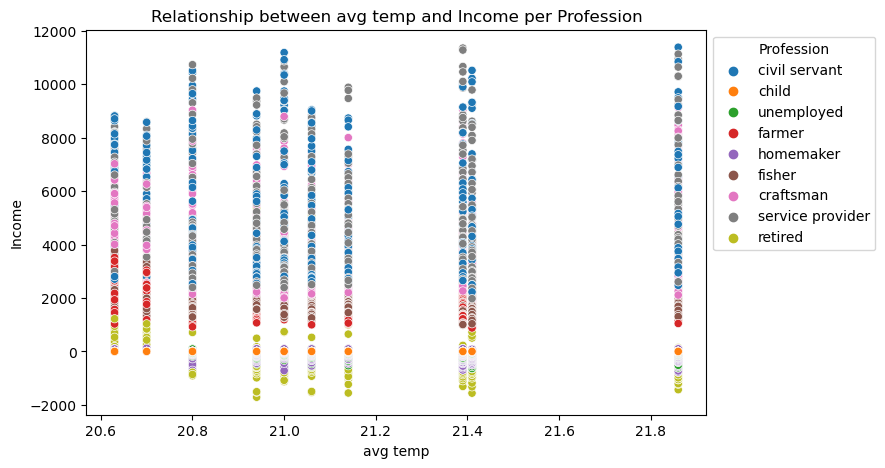

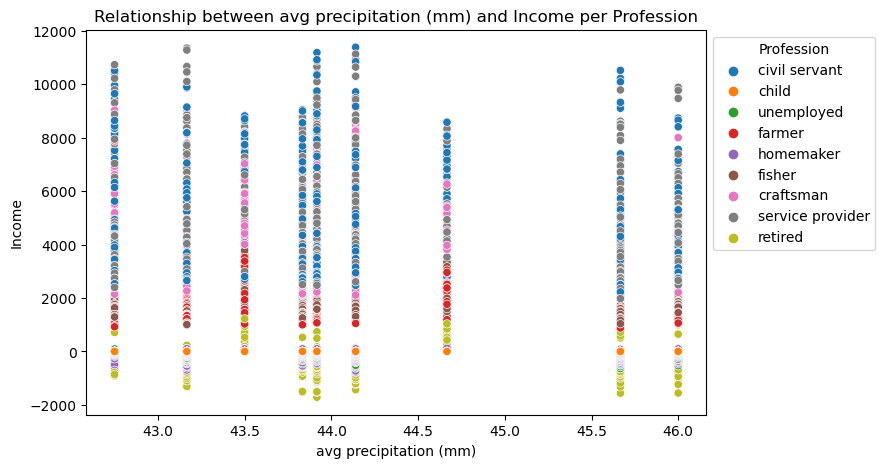

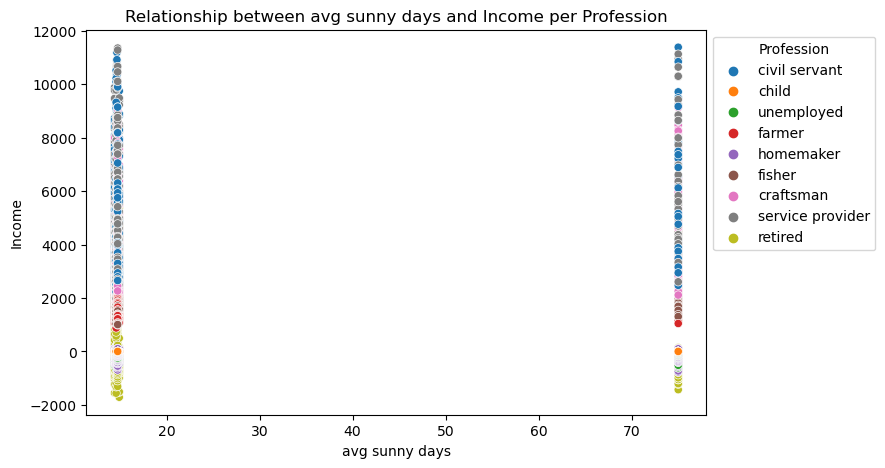

                   avg temp  avg precipitation (mm)  avg sunny days  \
profession                                                            
child             21.087655               44.137298       20.544817   
civil servant     21.060089               44.112788       20.397321   
craftsman         21.108283               44.167673       20.914937   
farmer            21.085290               44.156044       20.332418   
fisher            21.131593               44.167313       21.225026   
homemaker         21.062128               44.151194       19.968570   
retired           21.104163               44.257719       20.834918   
service provider  21.099241               44.135585       20.812391   
unemployed        21.078577               44.158116       21.313241   

                       income  
profession                     
child                0.000000  
civil servant     5884.227679  
craftsman         4516.957849  
farmer            2272.620487  
fisher            2668.226

In [38]:
# Analyze relation between weather and income per profession
weather_features = ['avg temp', 'avg precipitation (mm)', 'avg sunny days']
income_relation = df.groupby('profession')[weather_features + ['income']].mean()

# Plot the relationships
for feature in weather_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['income'], hue=df['profession'])
    plt.xlabel(feature)
    plt.ylabel('Income')
    plt.title(f'Relationship between {feature} and Income per Profession')
    plt.legend(title='Profession', bbox_to_anchor=(1, 1))
    plt.show()

# Display correlation between weather and income per profession
print(income_relation)

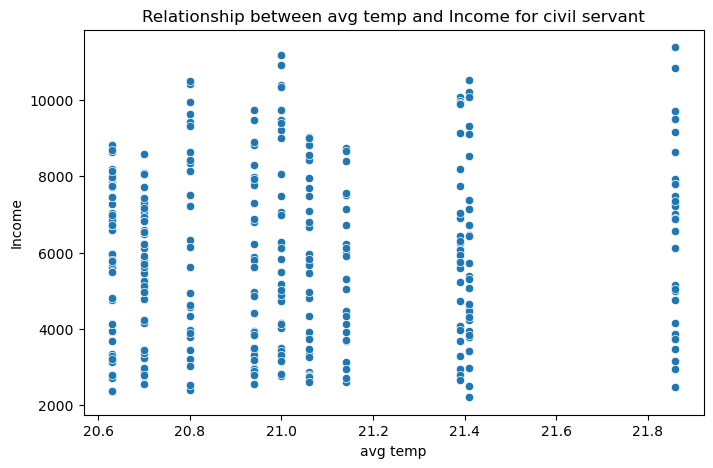

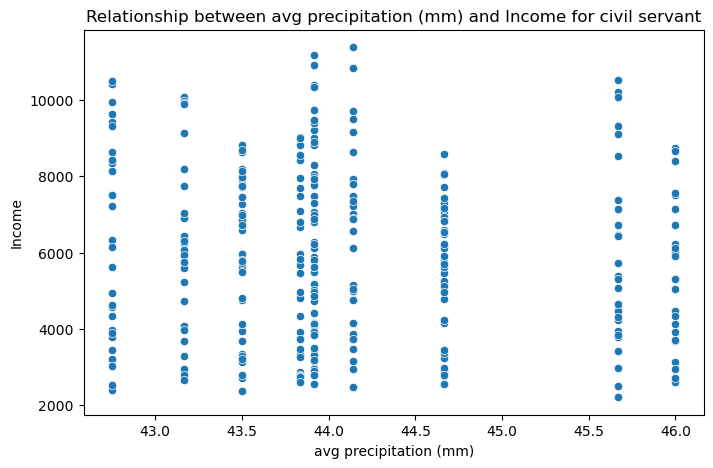

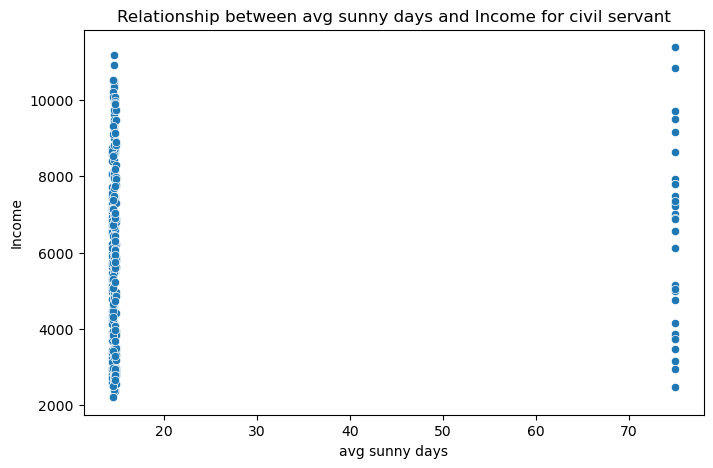

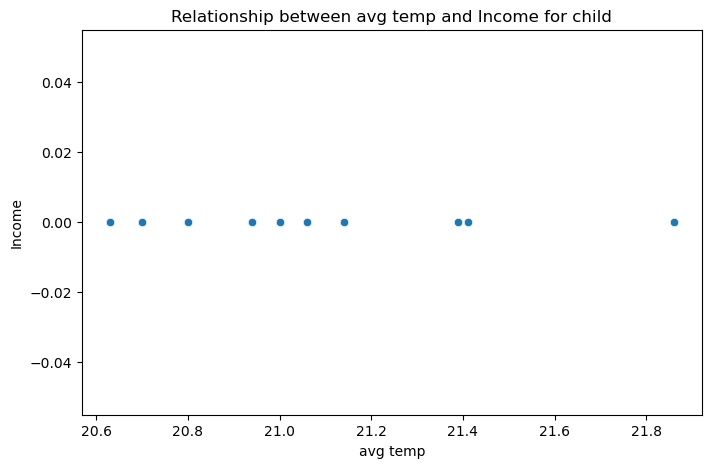

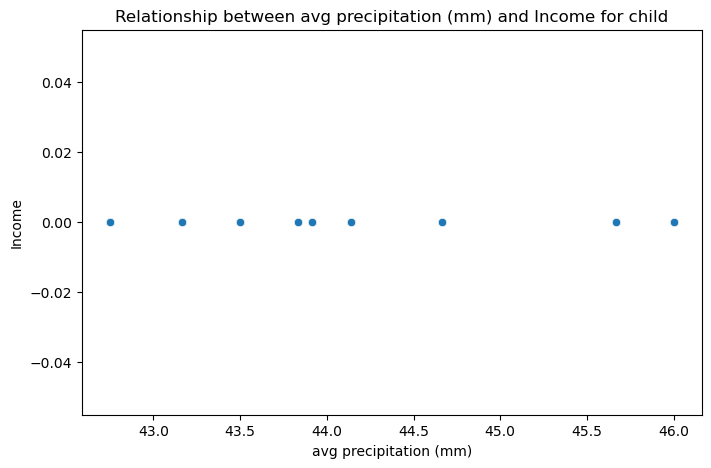

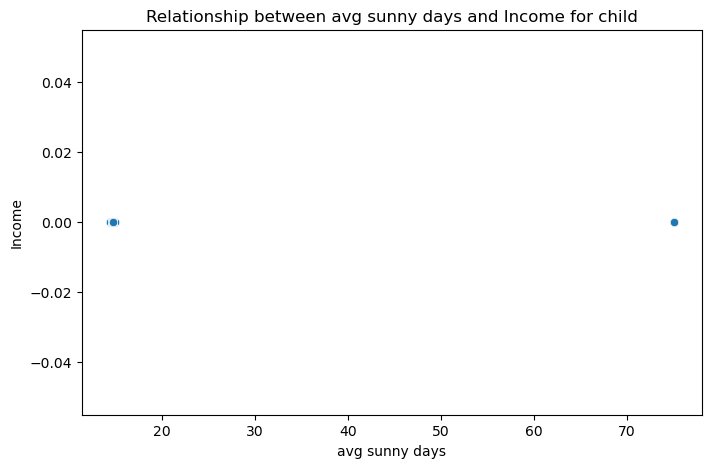

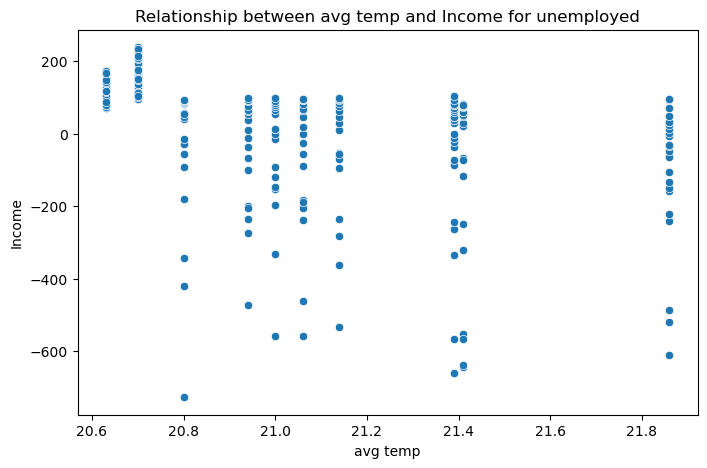

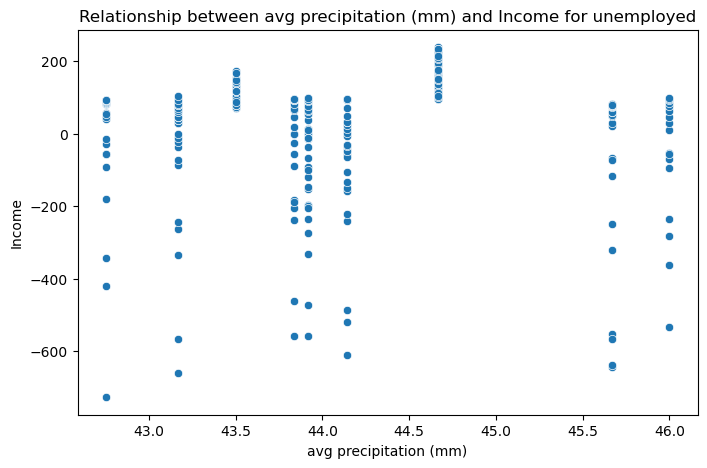

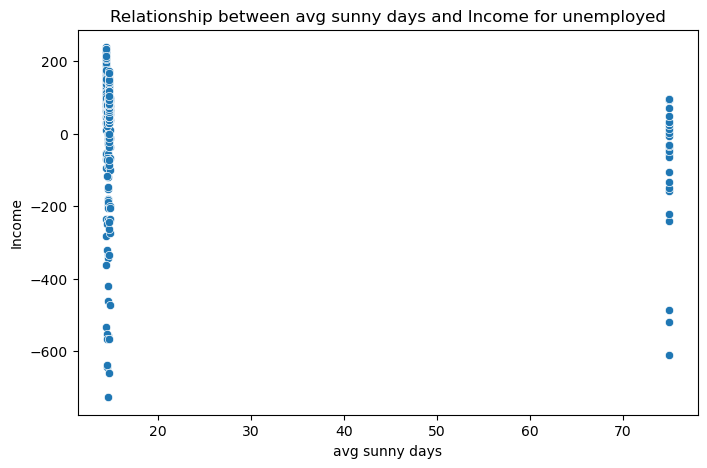

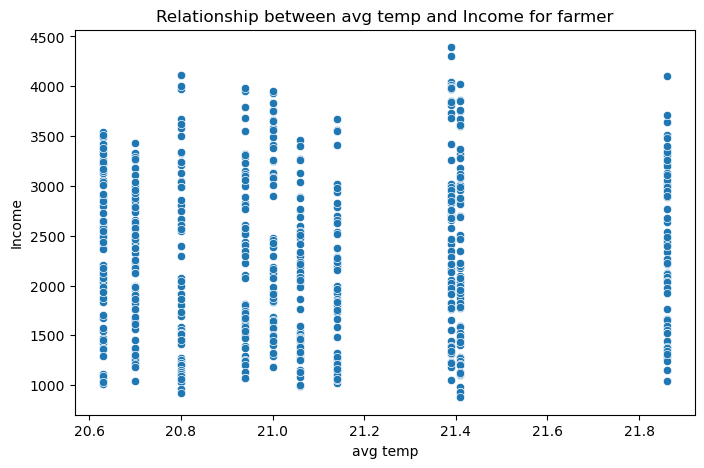

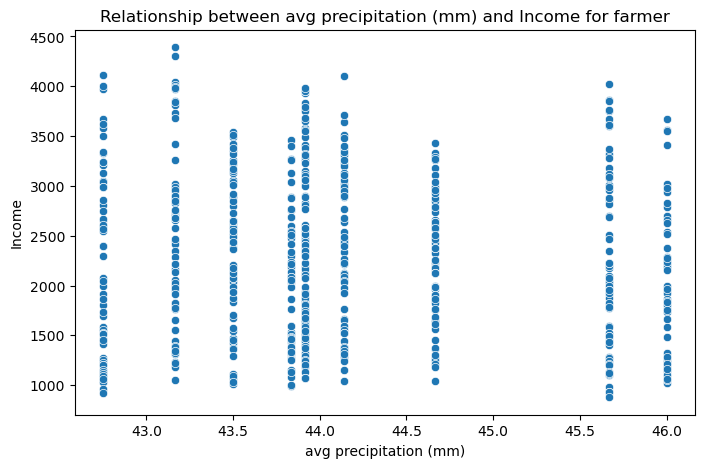

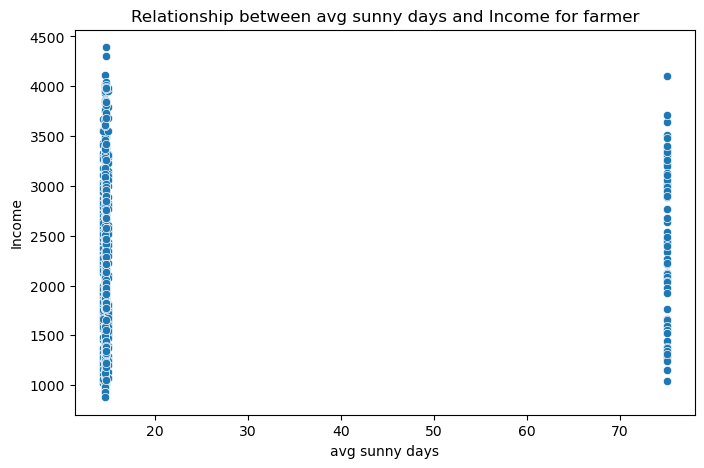

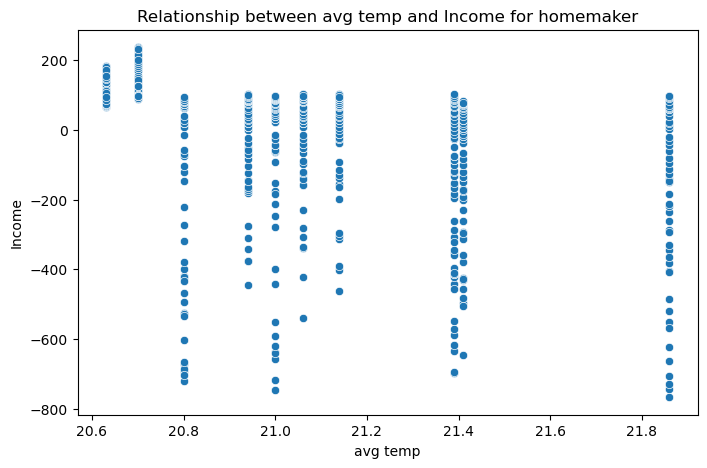

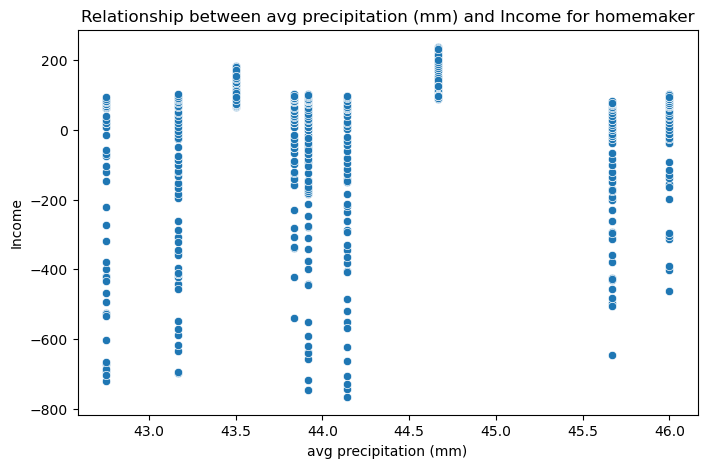

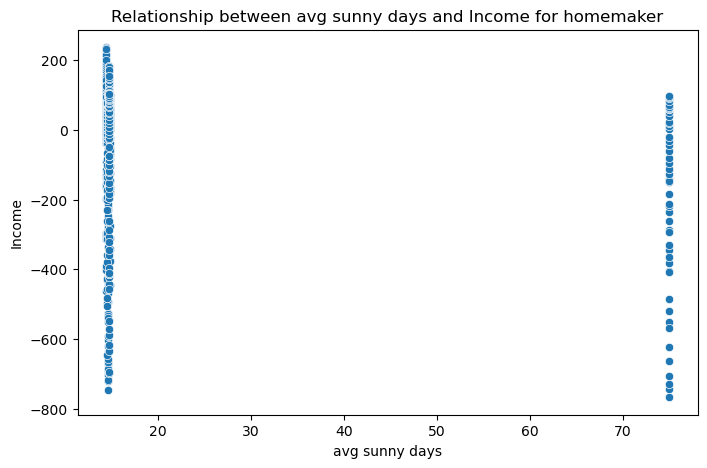

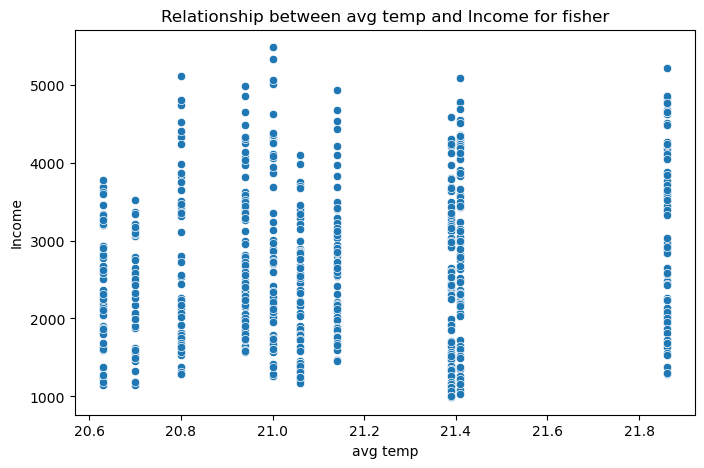

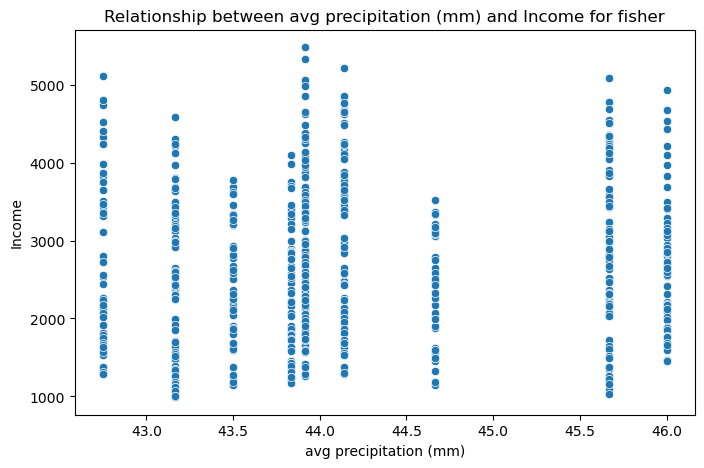

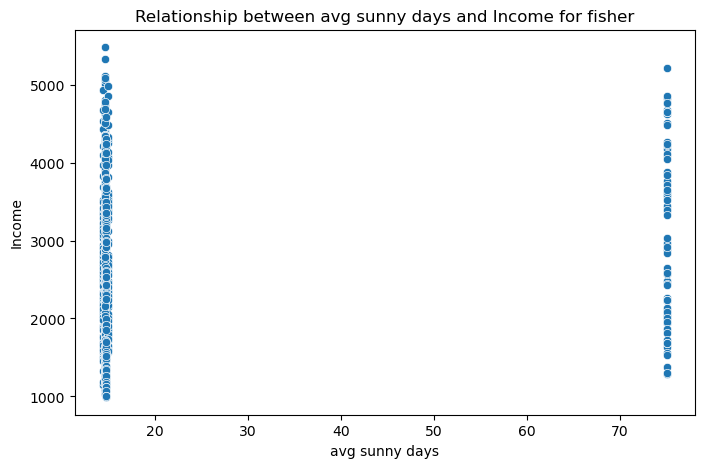

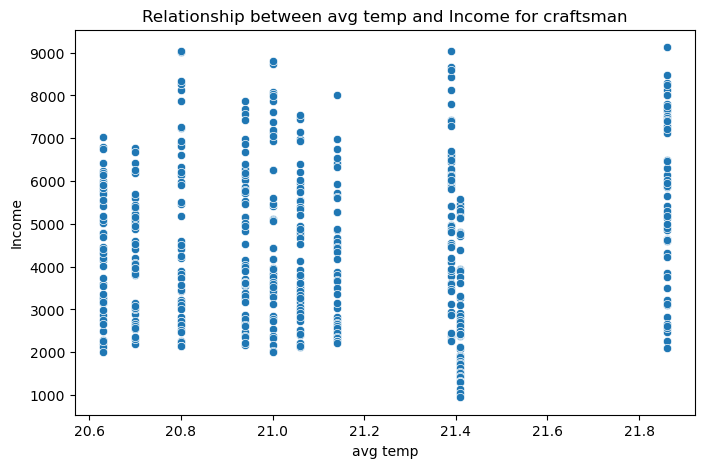

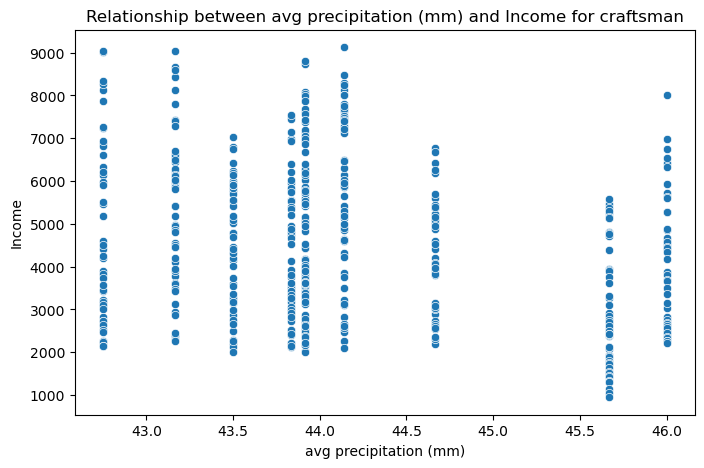

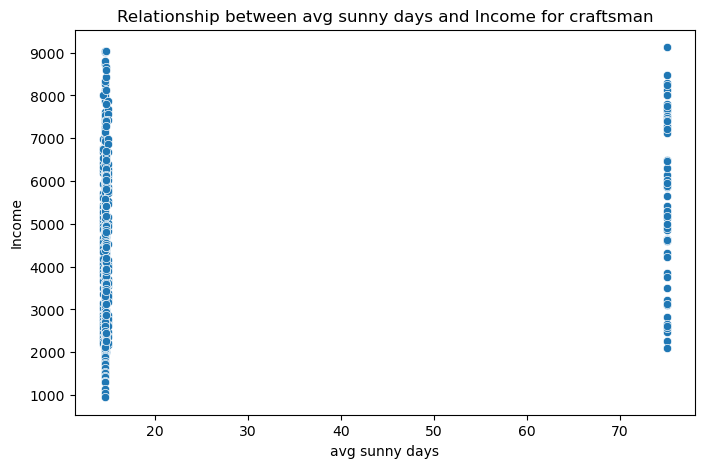

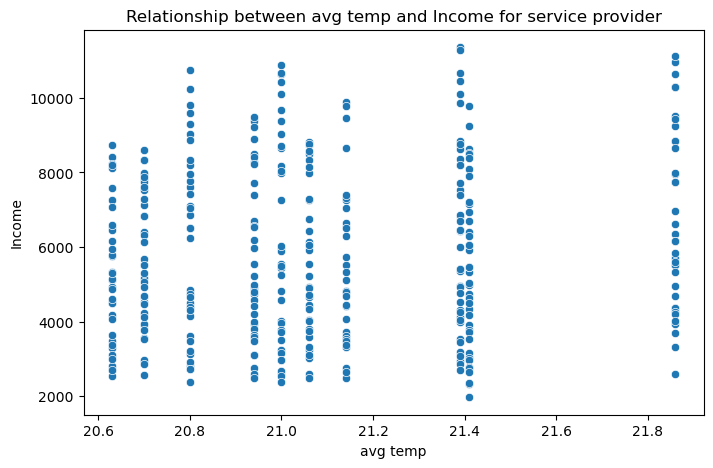

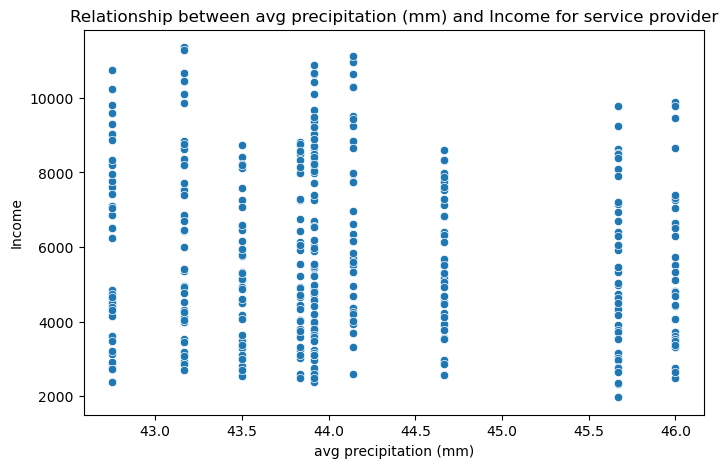

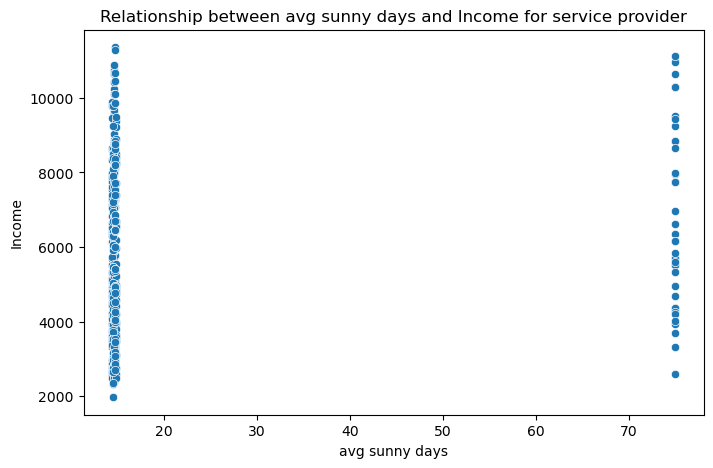

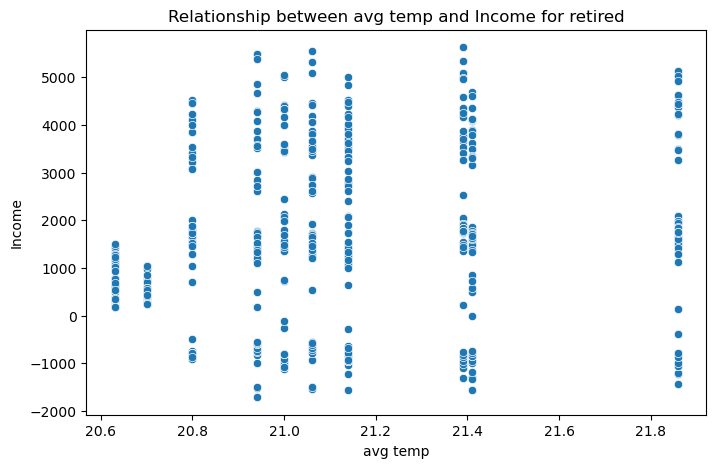

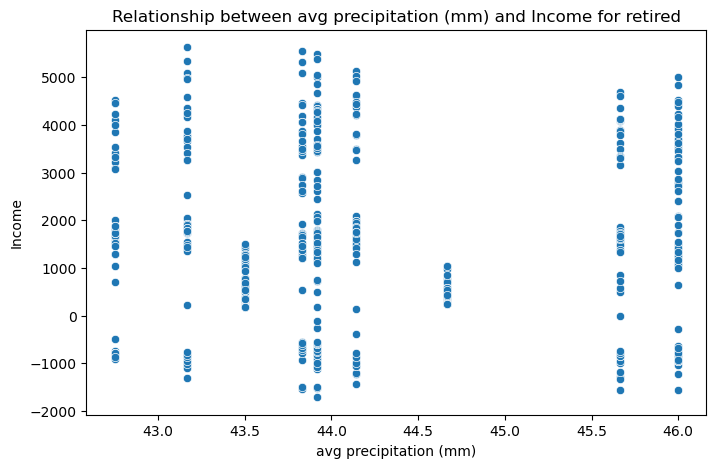

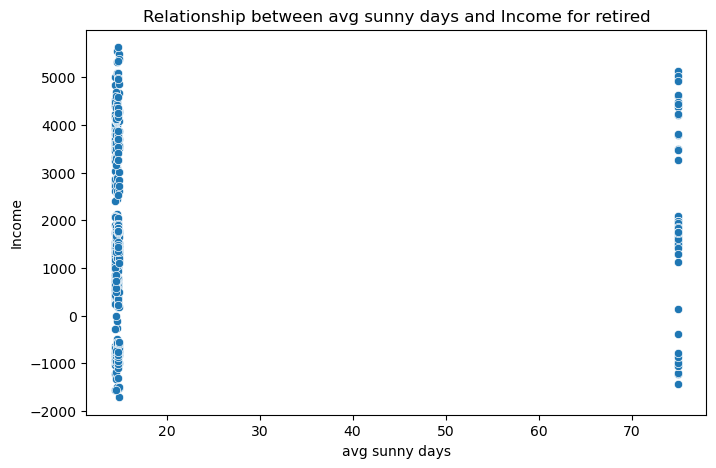

                   avg temp  avg precipitation (mm)  avg sunny days  \
profession                                                            
child             21.087655               44.137298       20.544817   
civil servant     21.060089               44.112788       20.397321   
craftsman         21.108283               44.167673       20.914937   
farmer            21.085290               44.156044       20.332418   
fisher            21.131593               44.167313       21.225026   
homemaker         21.062128               44.151194       19.968570   
retired           21.104163               44.257719       20.834918   
service provider  21.099241               44.135585       20.812391   
unemployed        21.078577               44.158116       21.313241   

                       income  
profession                     
child                0.000000  
civil servant     5884.227679  
craftsman         4516.957849  
farmer            2272.620487  
fisher            2668.226

In [39]:
# Analyze relation between weather and income per profession
weather_features = ['avg temp', 'avg precipitation (mm)', 'avg sunny days']
income_relation = df.groupby('profession')[weather_features + ['income']].mean()

# Plot the relationships for each profession
for profession in df['profession'].unique():
    for feature in weather_features:
        plt.figure(figsize=(8, 5))
        subset = df[df['profession'] == profession]  # Filter data for the current profession
        sns.scatterplot(x=subset[feature], y=subset['income'])
        plt.xlabel(feature)
        plt.ylabel('Income')
        plt.title(f'Relationship between {feature} and Income for {profession}')
        plt.show()

# Display correlation between weather and income per profession
print(income_relation)



In [40]:


# Selecting relevant features and target variable
features = ['year', 'avg temp', 'avg precipitation (mm)', 'avg sunny days']
target = 'gdp'

# Prepare training data
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# Forecasting the next 5 years
future_years = [max(df['year']) + i for i in range(5, 10)]
future_weather = pd.DataFrame({
    'year': future_years,
    'avg temp': [21.95,
21.96666667,
22.18333333,
22.18333333,
22.125],  
    'avg precipitation (mm)': [80.91666667,
76.75,
72,
81.91666667,
79.58333333],
    'avg sunny days': [15.08333333,
17,
17.25,
15.08333333,
14.83333333]  
})

# Predict GDP for future years
future_gdp_predictions = model.predict(future_weather)

# Display results
future_weather['predicted gdp'] = future_gdp_predictions
print(future_weather)


Mean Absolute Error: 2.4526670177188045e-09
   year   avg temp  avg precipitation (mm)  avg sunny days  predicted gdp
0   101  21.950000               80.916667       15.083333   1.225695e+06
1   102  21.966667               76.750000       17.000000   1.225695e+06
2   103  22.183333               72.000000       17.250000   1.225695e+06
3   104  22.183333               81.916667       15.083333   1.225695e+06
4   105  22.125000               79.583333       14.833333   1.225695e+06
